# Contraceptive dataset


In [1]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from ucimlrepo import fetch_ucirepo

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances 1473 - Features 9 - Class 3
   wife_age  wife_edu  husband_edu  num_children  wife_religion  wife_working  \
0        24         2            3             3              1             1   
1        45         1            3            10              1             1   
2        43         2            3             7              1             1   
3        42         3            2             9              1             1   
4        36         3            3             8              1             1   

   husband_occupation  standard_of_living_index  media_exposure  
0                   2                         3               0  
1                   3                         4               0  
2                   3                         4               0  
3                   3                         3               0  
4                   3                         2               0  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


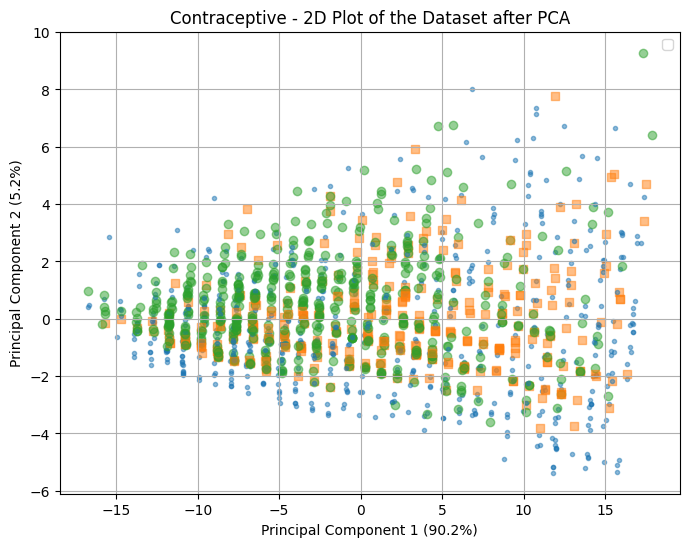

In [2]:

# fetch dataset
iris = fetch_ucirepo(id=30)

# data (as pandas dataframes)
X = pd.DataFrame(iris.data.features)
y = pd.DataFrame(iris.data.targets)
c = 3

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
plotting(X, y, ds_name="Contraceptive", matrix_plot=False)


# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [15]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [250.65520158102547, 250.65544848339414, 250.65550256610848, 250.65572588446602, 250.65574073485234, 250.65577301419097, 250.65586049508678, 250.65592605386922, 251.214092480498, 251.21956397822566]
ARI values: [0.02463884924139268, 0.02463884924139268, 0.02463884924139268, 0.02463884924139268, 0.025121886893366144, 0.02463884924139268, 0.02463884924139268, 0.025121886893366144, 0.03449281638586191, 0.03240351052191124]
NS values: [1.4652965898733172, 1.4165663477008124, 1.416572055136948, 1.4675821915022655, 1.465353059804063, 1.467579762547217, 1.3968055118579463, 1.4299808141661416, 1.43363747340531, 1.4408958307199042]
NMI values: [0.027695961757567434, 0.027695961757567434, 0.027695961757567434, 0.027695961757567434, 0.02836993234484261, 0.027695961757567434, 0.027695961757567434, 0.02836993234484261, 0.036916853044262565, 0.037495807310052726]


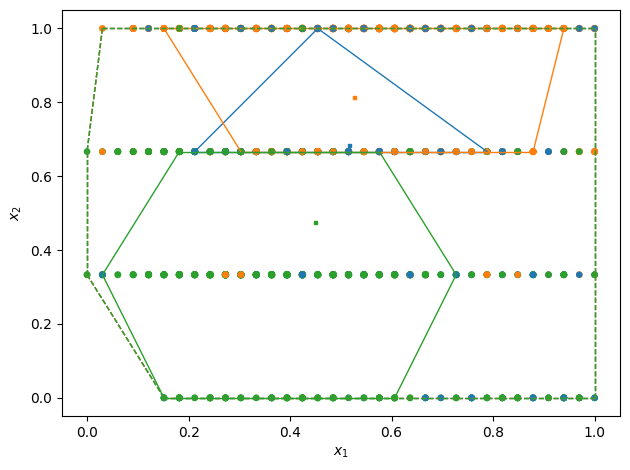

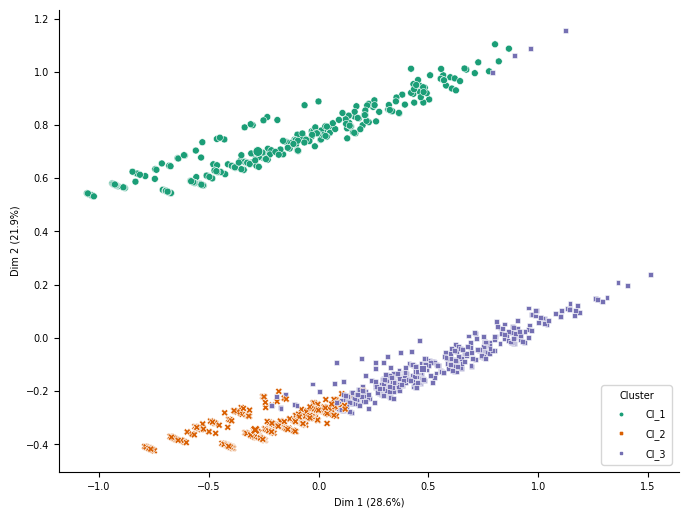

In [16]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [ ]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [2.5418585345156902e-27, 2.5419137587020745e-27, 5.0837406319720664e-27, 7.625598380013896e-27, 7.62681860352911e-27, 7.62681860352911e-27, 1.2714268866141612e-26, 1.525120421666853e-26, 1.525244913692616e-26, 3.05022934289893e-26]
ARI values: [-0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462, -0.012121516609126462]
NS values: [0.9325269376595858, 0.9325338065492371, 0.07443372379172775, 0.9953126405654147, 0.9325050582275874, 0.9325050582275874, 0.0713154861073163, 0.9976939701359457, 0.9332605181321288, 0.9331949842903429]
NMI values: [0.016823027712890685, 0.016823027712890685, 0.016823027712890685, 0.01682302771289068, 0.016823027712890685, 0.016823027712890685, 0.01682302771289069, 0.01682302771289068, 0.01682302771289069, 0.01682302771289069]


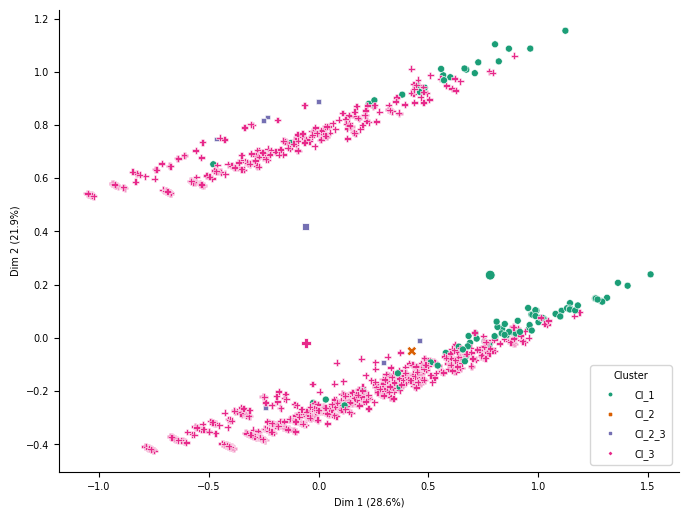

In [9]:
display_results_evidential(X, wecm_models, numeric_labels, up_low_appr=False)

# Weighted FCM - Keller et al. 2000

In [19]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [2.8741512881319574e-111, 1.90687505294267e-83, 6.873158265710252e-74, 1.831592295061246e-60, 4.995780071645171e-60, 8.021740771068446e-59, 3.89595544798311e-56, 7.009918993694151e-53, 8.339401712879606e-40, 1.661942147165189e-36]
ARI values: [-0.012121516609126462, -0.011905768718131978, 0.018792844198760553, 0.018792844198760553, -0.011905768718131978, -0.011905768718131978, 0.00013794791110192806, -0.011905768718131978, 0.00032656113110978525, 0.00032656113110978525]
NMI values: [0.01682302771289068, 0.01644674087624611, 0.009147013406736734, 0.009147013406736734, 0.01644674087624611, 0.01644674087624611, 0.002344883904193538, 0.01644674087624611, 0.0021966839528535296, 0.0021966839528535296]


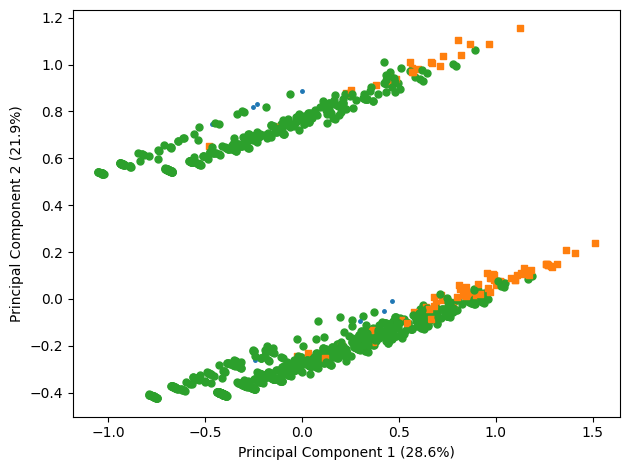

In [20]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [ ]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=5, verbose=True, init="None")
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [ ]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


In [ ]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [ ]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


In [ ]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [ ]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [ ]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

In [ ]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)